# Tensor

- 다차원 array를 표현하는 pytorch 클래스 
- Numpy에서 Ndarray와 같은 역할
- GPU에 올려서 사용 가능
    - data.device 를 사용해서 사용여부 확인 가능
    - GPU로 사용하기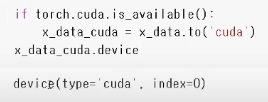

```
생성 
1. torch.FloatTensor()  -- 주로 사용
2. torch.tensor()
3. torch.form_numpy()


ndim : 차원확인
shape : shape확인
```

 ### data type 
 - numpy와 동일
 - gpu사용에 따라 차이가 조금 있음

- view : reshape과 동일하게 tensor의 shape를 변환
- squeeze : 차원의 개수가 1개인 차원을 삭제
- unsqueeze : 차원의 개수가 1개인 차원을 추가

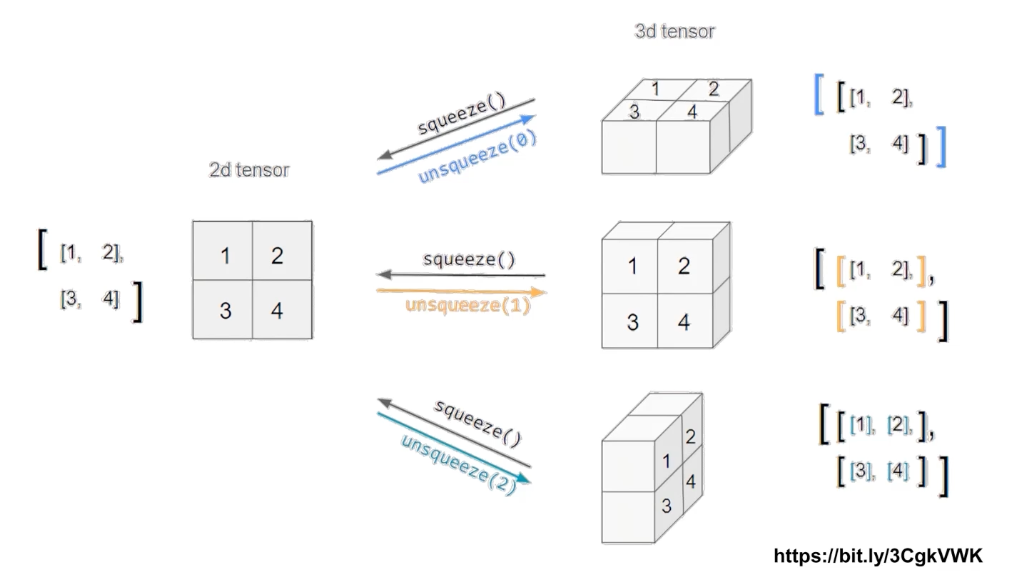

### tensor operations 
- numpy와 모두 동일
- 벡터간의 곱셈연산은 dot이 아닌 mm를 사용(=matmul)
    - dot은 내적
    - mm은 브로드케스팅을 미지원
    - matmul은 브로드케스팅을 지원
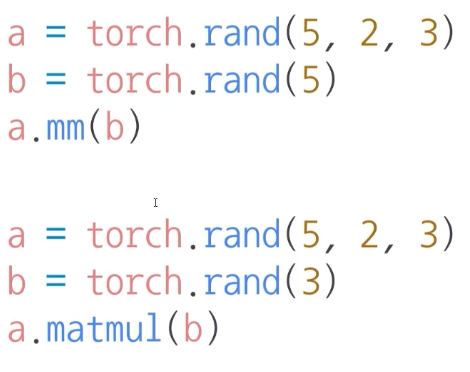
- mm은 계산이 불가능하지만 matmul은 계산이 가능

# AutoGrad(자동미분)

- pytorch는 자동미분을 지원 : backward함수를 사용
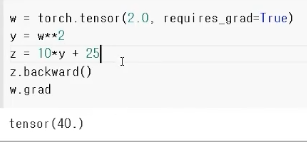
- 미분대상 : requires_grad 를 True로 
    - Linear같은 함수를 사용하면 requires_grad를 사용하지않음
- backward로 미분
- grad로 값을 확인

### numpy to tensor

In [4]:
import numpy as np
n_array = np.arange(10).reshape(2,5)
print(n_array)
print('ndim :',n_array.ndim, 'shape :' , n_array.shape)

[[0 1 2 3 4]
 [5 6 7 8 9]]
ndim : 2 shape : (2, 5)


In [6]:
import torch
t_array = torch.FloatTensor(n_array)
print(t_array)
print('ndim :',t_array.ndim, 'shape :' , t_array.shape)

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])
ndim : 2 shape : torch.Size([2, 5])


### array to tensor 

In [7]:
# data to tensor 
data = [[3,5],[10,5]]
x_data = torch.tensor(data)
x_data

tensor([[ 3,  5],
        [10,  5]])

In [10]:
# ndarray to tensor 
nd_array_ex = np.array(data)
tensor_array = torch.from_numpy(nd_array_ex)
tensor_array

tensor([[ 3,  5],
        [10,  5]])

### numpy like operations 

In [11]:
data = [[3,5,20],[10,5,50],[1,5,10]]
x_data = torch.tensor(data)

In [12]:
x_data[1:]

tensor([[10,  5, 50],
        [ 1,  5, 10]])

In [13]:
x_data[:2,1:]

tensor([[ 5, 20],
        [ 5, 50]])

In [14]:
x_data.flatten()

tensor([ 3,  5, 20, 10,  5, 50,  1,  5, 10])

In [15]:
torch.ones_like(x_data)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])

In [16]:
x_data.numpy()

array([[ 3,  5, 20],
       [10,  5, 50],
       [ 1,  5, 10]])

In [18]:
x_data.shape

torch.Size([3, 3])

In [19]:
x_data.dtype

torch.int64

### GPU

In [20]:
x_data.device

device(type='cpu')

### tensor handling

In [23]:
ten = torch.rand(size=(2,3,2))
ten

tensor([[[0.1928, 0.1078],
         [0.6134, 0.7426],
         [0.1697, 0.1891]],

        [[0.4772, 0.4986],
         [0.7968, 0.6327],
         [0.3099, 0.1006]]])

In [24]:
ten.view([-1,6])

tensor([[0.1928, 0.1078, 0.6134, 0.7426, 0.1697, 0.1891],
        [0.4772, 0.4986, 0.7968, 0.6327, 0.3099, 0.1006]])

In [25]:
ten.reshape([-1,6])

tensor([[0.1928, 0.1078, 0.6134, 0.7426, 0.1697, 0.1891],
        [0.4772, 0.4986, 0.7968, 0.6327, 0.3099, 0.1006]])

In [26]:
a = torch.zeros(3,2)
b = a.view(2,3)
a.fill_(1)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [27]:
a

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [29]:
b
# a에 fill 한 행위까지 복제됨
# copy의 행위가 아님

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [45]:
a = torch.zeros(3,2)
b = a.t().reshape(6)
a.fill_(1)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [46]:
a

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [48]:
b

tensor([0., 0., 0., 0., 0., 0.])

In [53]:
ten1 = torch.rand(size=(2,1,2))
ten1

tensor([[[0.0727, 0.1957]],

        [[0.2043, 0.9933]]])

In [54]:
ten1.squeeze()

tensor([[0.0727, 0.1957],
        [0.2043, 0.9933]])

In [55]:
ten2 = torch.rand(size=(2,2))
ten2

tensor([[0.1362, 0.0041],
        [0.0450, 0.4638]])

In [56]:
ten2.unsqueeze(0)

tensor([[[0.1362, 0.0041],
         [0.0450, 0.4638]]])

In [57]:
ten2.unsqueeze(1)

tensor([[[0.1362, 0.0041]],

        [[0.0450, 0.4638]]])

In [58]:
ten2.unsqueeze(2)

tensor([[[0.1362],
         [0.0041]],

        [[0.0450],
         [0.4638]]])

### tensor operations

In [59]:
n1 = np.arange(10).reshape(2,5)
n2 = np.arange(10).reshape(5,2)
t1 = torch.FloatTensor(n1)
t2 = torch.FloatTensor(n2)


In [60]:
t1.mm(t2)

tensor([[ 60.,  70.],
        [160., 195.]])

In [61]:
t1.dot(t2)

RuntimeError: 1D tensors expected, but got 2D and 2D tensors

In [62]:
t1.matmul(t2)

tensor([[ 60.,  70.],
        [160., 195.]])

### autograd

In [63]:
w = torch.tensor(2.0, requires_grad=True)
y = w**2
z = 10*y + 25
z.backward()
w.grad

tensor(40.)